# Example 2: Stickleback geometric morphometrics

In this example phenopype is used to place morphometric landmarks across the anterior half of a stickleback (*Gasterosteus aculeatus*) stained with alizarin red. We also use the image-registration algorithm in `detect_reference` to find a reference card and automatically size and colour-correct the image.

<div style="display: flex; flex-direction: row; text-align:left; gap: 10px;"  class="row">
    
<div class="col-md-6" style="flex: 1 1 0px;">

![Before](_figures/project_2_before.jpg)

**Input** - Stained threespine stickleback, photographed in a glycerol bath from a camera stand
</div>
<div class="col-md-6" style="flex: 1 1 0px;">

    
![After](_figures/project_2_after.jpg)

**Results** - 22 landmarks are placed using the landmarks tool from the `measurements` module
</div>
</div>

Images kindly provided by Blake Matthews.

## Background

Functional morphology of organisms is often measured by placing landmarks at specific points that show structural, functional or developmental significance. Lake and stream ecotypes of threespine stickleback differ in their morphology: lake stickleback posess elongated spines and a set of tall bony lateral plates that cover most of the body, whereas stream ecotypes have shorter spines and a reduced plate coverage - i.e., fewer and shorter plates, as reviewed in [Hudson et al. (2021)](https://www.frontiersin.org/articles/10.3389/fevo.2020.611672/full).

## Preparation

This first step creates the necessary working directories and attempts to retrive the configuration template from the online repository, or your own machine, if you downloaded the repo.  

In [1]:
import phenopype as pp
import os
import urllib.request

## change for your own machine
name_stub = "example2"
working_dir = os.path.join(r"D:\workspace\git-repos\phenopype\phenopype-gallery\_temp", name_stub)
template_repo_path = r"D:\workspace\git-repos\phenopype\phenopype-templates"

## create dir, if not existent
if not os.path.isdir(working_dir):
    os.makedirs(working_dir)
os.chdir(working_dir)

## set template name 
template_name = "gallery-" + name_stub + ".yaml"

## download Pype-template from online-repo ...
try:
    url = "https://raw.githubusercontent.com/phenopype/phenopype-templates/main/templates/gallery/" + template_name
    urllib.request.urlretrieve(url, template_name)
    if os.path.isfile(template_name):
        template_path = template_name
except:
    print("could not retrieve template from online repo")

## ... or provide link to downloaded phenopype-templates repo (exchange for your own directory)
if os.path.isdir(template_repo_path):
    if "templates" in os.listdir(template_repo_path):
        template_path = os.path.join(template_repo_path, r"templates\gallery", template_name)
        
## confirm template exists
if os.path.isfile(template_path):
    print(os.path.abspath(template_path))
else:
    print("something went wrong - could not find template")

D:\workspace\git-repos\phenopype\phenopype-templates\templates\gallery\gallery-example2.yaml


## Example project

In [2]:
proj = pp.Project("project")

--------------------------------------------
Found existing project root directory - loading from:
D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example2\project

Project "project" successfully loaded with 3 images
--------------------------------------------


In [3]:
## add all stickleback-images from the data folder, but exclude the two that don't belong to the series 
proj.add_files(image_dir = r"../../gallery/data", include="stickle", exclude=["side","top"])

--------------------------------------------
phenopype will search for image files at

D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data

using the following settings:

filetypes: ['jpg', 'JPG', 'jpeg', 'JPEG', 'tif', 'png', 'bmp'], include: stickle, exclude: ['side', 'top'], mode: copy, recursive: False, resize: False, unique: path

Found image stickle1.jpg - 0__stickle1 already exists (overwrite=False)
Found image stickle2.jpg - 0__stickle2 already exists (overwrite=False)
Found image stickle3.jpg - 0__stickle3 already exists (overwrite=False)

Found 3 files
--------------------------------------------


In [4]:
## add the config template; provide a tag
proj.add_config(template_path=template_path, tag="v1", overwrite=True)

- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example2\project\data\0__stickle1\pype_config_v1.yaml (overwritten)
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example2\project\data\0__stickle2\pype_config_v1.yaml (overwritten)
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example2\project\data\0__stickle3\pype_config_v1.yaml (overwritten)


Next we need to add information from a reference image to provide a project wide px-to-mm scale, which we will need to adjust our landmark coordinate space. This is important if for example the distance between the camera and your sample changes.  

<center>
<div style="width:600px; text-align: left">
    
![Adding a scale](_figures/project_2_scale.gif)
    
**Fig. 1:** Create a size reference - also see https://www.phenopype.org/docs/tutorials/tutorial_5/.
    
</div>
</center>

In [5]:
## set the project-wide reference. the reference has its own tag, in case your project uses multiple reference cards
proj.add_reference(reference_image_path= r"../../gallery/data/stickleback_side.jpg", reference_tag="stickle-scale")

Reference image not saved, file already exists - use "overwrite==True" or chose different name.
setting active global project reference to "stickle-scale" for 0__stickle1 (active=True)
setting active global project reference to "stickle-scale" for 0__stickle2 (active=True)
setting active global project reference to "stickle-scale" for 0__stickle3 (active=True)


<center>
<div style="width:600px; text-align: left">
    
![Adding a scale](_figures/project_2_high-throughput.gif)
    
**Fig. 2:** You can modify, for instance, point size and colour for the landmarks while adding them (or before adding the template). Note that point characteristics need to be changed separately for setting the landmarks and visualizing them (this goes for all GUI-annotations like masks, lines, etc.).
    
</div>
</center>

In [6]:
## run image processing
for path in proj.dir_paths:
    pp.Pype(path, tag="v1")

Format path to abspath
- no annotation_type selected - returning all annotations

AUTOLOAD
- annotations loaded:
{
"reference": ["a"],
"comment": ["a"],
"landmark": ["a"]
}
- reference template image loaded from root directory
Fixed method name
Fixed method name
updating pype config file


------------+++ new pype iteration 2022-01-14 14:40:45 +++--------------




PREPROCESSING
detect_reference
- loaded existing annotation of type "reference" with ID "a": skipping (edit=False)
write_comment
- loaded existing annotation of type "comment" with ID "a": skipping (edit=False)


MEASUREMENT
set_landmark
- loaded existing annotation of type "landmark" with ID "a": skipping (edit=False)


VISUALIZATION
draw_landmark
- "landmark_id" not provided: using last annotation of type "landmark" with ID "a"
draw_reference
- "reference_id" not provided: using last annotation of type "reference" with ID "a"


EXPORT
save_annotation
- loading existing annotation file
- annotation of type "reference" with 

In [7]:
## collect results and store in folder "<project-root>/results/annotations"
proj.collect_results("v1", "annotations", "annotations")

Search string: ['annotations_v1']
Collected annotations_v1.json from 0__stickle1
0__stickle1_annotations_v1.json not saved - file already exists (overwrite=False).
Collected annotations_v1.json from 0__stickle2
0__stickle2_annotations_v1.json not saved - file already exists (overwrite=False).
Collected annotations_v1.json from 0__stickle3
0__stickle3_annotations_v1.json not saved - file already exists (overwrite=False).



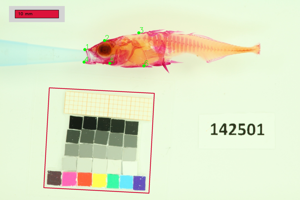
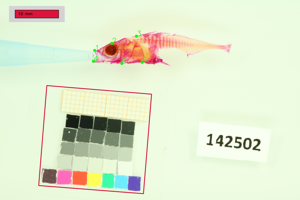
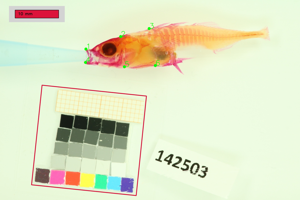


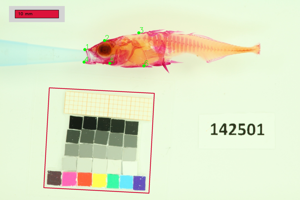
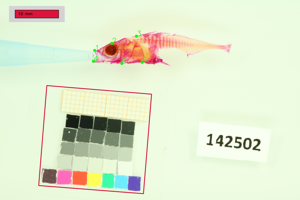
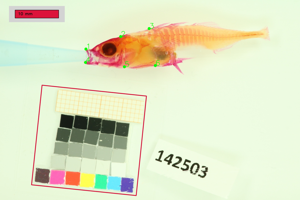

In [14]:
## display results
import ipyplot ## install with `pip install ipyplot`

canvas_list = []
for path in proj.dir_paths:
    canvas_list.append(pp.load_image(os.path.join(path, "canvas_v1.jpg"), mode="rgb"))

ipyplot.plot_images(canvas_list, img_width=300)